### This is Inception Model Transfer Learning

- We will use Keras to build an inception model

In [5]:
import os
import glob
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
import shutil
import PIL
import numpy as np

In [ ]:
from keras import applications

inception_model = applications.InceptionV3(weights='imagenet',
                               include_top=False,
                               pooling=None,
                               input_shape=(299, 299, 3))


inception_model.summary()

In [3]:
dogs_trng = glob.glob("data/train/dogs/*")
cats_trng = glob.glob("data/train/cats/*") 
dogs_val = glob.glob("data/validation/dogs/*")
cats_val=glob.glob("data/validation/cats/*")
len(dogs_trng), len(cats_trng),len(dogs_val), len(cats_val)

(12501, 12501, 400, 399)

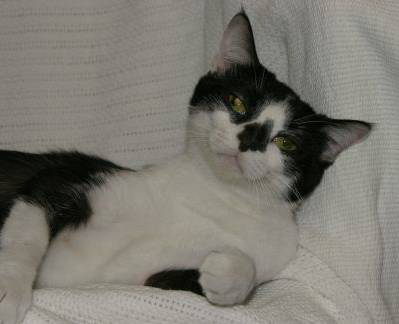

In [8]:
val = np.random.randint(0,10000)
load_img(cats_trng[val])

In [9]:
#Build a Keras Graph
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers  import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [10]:
'''
from keras.utils import multi_gpu_model

model = Sequential()
#First conv output of 32 layer 3,3 matrix
model.add(Conv2D(64,(3,3), input_shape=(299,299,3), padding="same" ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# Second Conv Layes
model.add(Conv2D(128,(3,3),padding="same" ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding="same" ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(512,(3,3),padding="same" ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("elu"))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation("elu"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation("sigmoid"))
opt = keras.optimizers.Adagrad(lr=0.001)
#parallel_model = multi_gpu_model(model, gpus=2)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])'''

'\nfrom keras.utils import multi_gpu_model\n\nmodel = Sequential()\n#First conv output of 32 layer 3,3 matrix\nmodel.add(Conv2D(64,(3,3), input_shape=(299,299,3), padding="same" ))\nmodel.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n# Second Conv Layes\nmodel.add(Conv2D(128,(3,3),padding="same" ))\nmodel.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(256,(3,3),padding="same" ))\nmodel.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n\nmodel.add(Conv2D(512,(3,3),padding="same" ))\nmodel.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n\nmodel.add(Flatten())\nmodel.add(Dense(1024))\nmodel.add(Activation("elu"))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(512))\nmodel.add(Activation("elu"))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(1))\nmodel.add(Activation("sigmoid"))\nopt = keras.optimizers.Adagrad(lr=0.001)\n#parallel_model = multi_gpu_model(model, gpus=2)\nmodel.compile(loss=\'binary_cro

In [11]:
#model.summary()

In [12]:
batch_size = 10
train_datagen =  ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
!ls data/train

cats  dogs


In [18]:
train_generator = train_datagen.flow_from_directory('data/train',target_size=(299,299), batch_size=10, class_mode="binary")

Found 25000 images belonging to 2 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='binary')

Found 799 images belonging to 2 classes.


In [ ]:
import keras
#TBlogger = keras.callbacks.ModelCheckpoint("./logs", monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
history = model.fit_generator(train_generator, steps_per_epoch=2500, epochs=20, validation_data=validation_generator, validation_steps=800, callbacks=[early_stopping])



Epoch 1/20
2500/2500 [==============================] - 581s 232ms/step - loss: 0.5462 - acc: 0.7212 - val_loss: 0.4265 - val_acc: 0.8073
Epoch 2/20
2500/2500 [==============================] - 526s 210ms/step - loss: 0.4223 - acc: 0.8066 - val_loss: 0.3664 - val_acc: 0.8461
Epoch 3/20
2500/2500 [==============================] - 526s 210ms/step - loss: 0.3673 - acc: 0.8388 - val_loss: 0.3191 - val_acc: 0.8636
Epoch 4/20
2500/2500 [==============================] - 526s 210ms/step - loss: 0.3330 - acc: 0.8572 - val_loss: 0.2833 - val_acc: 0.8924
Epoch 5/20
2500/2500 [==============================] - 526s 210ms/step - loss: 0.3061 - acc: 0.8686 - val_loss: 0.2525 - val_acc: 0.9024
Epoch 6/20
2500/2500 [==============================] - 524s 210ms/step - loss: 0.2842 - acc: 0.8789 - val_loss: 0.2367 - val_acc: 0.9161
Epoch 7/20
2500/2500 [==============================] - 526s 210ms/step - loss: 0.2653 - acc: 0.8890 - val_loss: 0.2332 - val_acc: 0.9124
Epoch 8/20
2500/2500 [============

In [ ]:
model.save("cat_dog_modelgood.h5")

In [24]:
!ls -ltr

total 102820
drwxr-xr-x 4 sdutta sdutta     4096 Jun  8 15:52 data
-rw-r--r-- 1 sdutta sdutta 62469005 Jun  8 18:19 catsdog_1000.tar.gz
-rw-rw-r-- 1 sdutta sdutta   153417 Jun  8 20:22 CatsDogsClassifier.ipynb
-rw-rw-r-- 1 sdutta sdutta 42653176 Jun  8 20:23 first_model.h5


In [26]:
def convert_image_to_bgr_numpy_array(image_path, size=[224,224]):
    """The network has been trained using opencv and BGR images 
    (i.e. channels order blue, green, red rather than red, green, blue).
    The description of why is https://stackoverflow.com/questions/14556545/why-opencv-using-bgr-colour-space-instead-of-rgb
    
    We can use a simpler image library as long as we manually convert
    the data to the expected format.
    """
    image = PIL.Image.open(image_path).resize((size),PIL.Image.ADAPTIVE)
    img_data = np.array(image.getdata(), np.float32).reshape(224,224, -1)
    # swap R and B channels
    img_data = np.flip(img_data, axis=2)
    return img_data

def prepare_image(image_path):
    im = convert_image_to_bgr_numpy_array(image_path)

    # these subtractions are just mean centering the images 
    # based on known means for different color channels
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68

    im = im.transpose((2,0,1)) # adjust from (224, 224, 3) to (3, 224, 224) for keras
    im = np.expand_dims(im, axis=0) # adjust to (1, 3, 224, 224) for generating keras prediction
    return im

In [18]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.utils import multi_gpu_model
# note we exclude the final dense layers and add one back below, we would retrain it ourselves
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)) 
 
# Freeze convolutional layers
for layer in base_model.layers:
    print layer
    layer.trainable = False    
    
x = base_model.output
x = Flatten()(x) # flatten from convolution tensor output 
x = Dense(256, activation="relu")(x)
x= Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(1, activation='sigmoid')(x) # should match # of classes predicted

# this is the model we will train

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=["accuracy"])
#parallel_model = multi_gpu_model(model, gpus=3)
#parallel_model.compile()
print base_model.input.shape
print base_model.output.shape[1:]

#model.fit_generator(train_generator, steps_per_epoch=2000, epochs=5, validation_data=validation_generator, validation_steps=800)

(?, 224, 224, 3)
(7, 7, 512)


In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

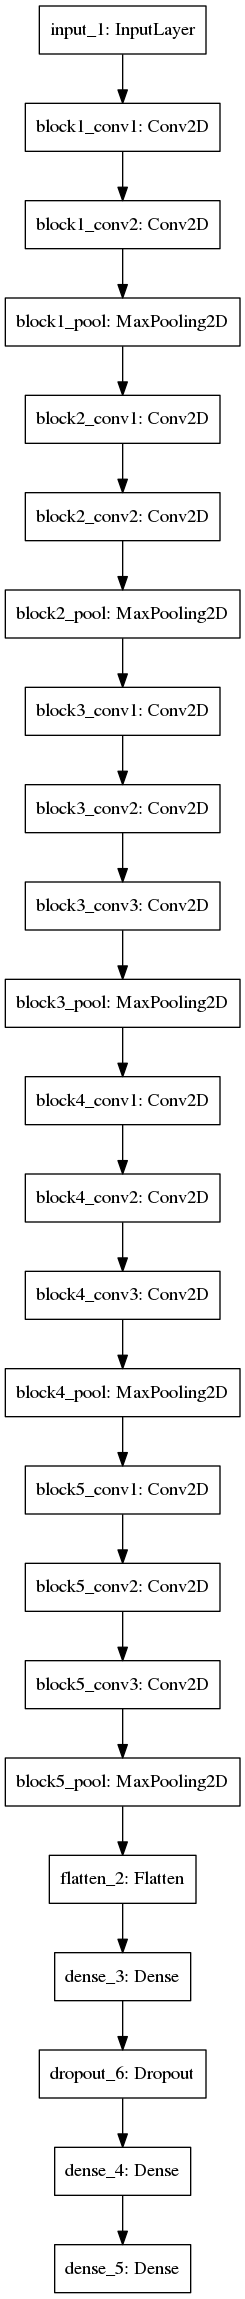

In [20]:
load_img("vgg.png")